<a href="https://colab.research.google.com/github/nitish-bha/100-DAY-Coding/blob/main/Capstone_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets && touch /root/.ipython/profile_default/startup/00-first.py && echo "import datasets" >> /root/.ipython/profile_default/startup/00-first.py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.6 MB/s eta 0:00:00


In [ ]:
! pip install -U accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.9/330.9 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.34.2
    Uninstalling accelerate-0.34.2:
      Successfully uninstalled accelerate-0.34.2


In [ ]:
!pip install transformers==4.44.2 huggingface_hub==0.24.7 torch umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00


In [ ]:
# all imports required
import datasets
import transformers
import torch
import umap.umap_ as umap
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import huggingface_hub
import accelerate

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

**1. Business Objective:**

**Framing the Problem:**
Amazon wishes to improve product offerings, customer satisfaction and overrall business performance. An opportunity to solve this problem exist if we are able to derive meaning from the customer reviews

**Goal:**
The goal of this project is to build a sentiment analysis model that can automatically label reviews based on their sentiment, product trends and commong complaints or praises. The outcome will be a comprehensive report that provides actionable insights, using machine learning and natural language processing techniques for sentiment analysis


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls /content/ drive/My\ Drive/Capstone

/content/:
drive/  sample_data/

'drive/My Drive/Capstone':
amazon_reviews_us_Mobile_Electronics_v1_00.tsv  processed.csv  train/
dataset_dict.json                               test/          validation/


In [ ]:
file_path = '/content/drive/My Drive/Capstone/amazon_reviews_us_Mobile_Electronics_v1_00.tsv'
folder_path = '/content/drive/My Drive/Capstone'

In [ ]:
import pandas as pd
df = pd.read_csv(file_path, sep="\t", on_bad_lines='skip')

**2. Exploring the Data**

In [ ]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,217304173,BlackVue DR600GW-PMP,Mobile_Electronics,5.0,0.0,0.0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",2015-08-31
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,137313254,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5.0,0.0,1.0,N,Y,five star,it's great,2015-08-31
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5.0,0.0,0.0,N,Y,great cables,These work great and fit my life proof case fo...,2015-08-31
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,221169481,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4.0,0.0,0.0,N,Y,Work very well but couldn't get used to not he...,Work very well but couldn't get used to not he...,2015-08-31
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2.0,0.0,0.0,N,Y,Cameras has battery issues,"Be careful with these products, I have bought ...",2015-08-31


In [ ]:
df.tail()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
104847,US,38978459,R2CDRVDUKB5Z9P,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5.0,23.0,27.0,N,N,The Cat Barf is Gone!,"I've been looking for a while for the \\""purr\...",2002-04-03
104848,US,51697602,R1DVLTZFXXOX9,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5.0,10.0,11.0,N,N,Well worth [it],We live in an apartment with hardwood floors a...,2002-03-05
104849,US,50891675,R1GHKKZMHAHQC1,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5.0,13.0,13.0,N,N,Its a Time saver!!!,I received this for a birthday present and Its...,2002-02-19
104850,US,38528439,R227G6T5B26DVC,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,5.0,58.0,61.0,N,N,Got Stains?,I got the Dirt Devil Spot Scrubber for a gift ...,2002-01-06
104851,US,47099634,R44WS2RSQQ0HR,B00005OTZQ,554527960,Royal SE 2800 Hand-Held Spot Cleaner,Mobile_Electronics,4.0,37.0,38.0,N,N,no smell has to mean it is getting the job don...,I purchased this about three weeks ago along w...,2001-12-22


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104852 entries, 0 to 104851
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   marketplace        104852 non-null  object 
 1   customer_id        104852 non-null  int64  
 2   review_id          104852 non-null  object 
 3   product_id         104852 non-null  object 
 4   product_parent     104852 non-null  int64  
 5   product_title      104852 non-null  object 
 6   product_category   104852 non-null  object 
 7   star_rating        104850 non-null  float64
 8   helpful_votes      104850 non-null  float64
 9   total_votes        104850 non-null  float64
 10  vine               104850 non-null  object 
 11  verified_purchase  104850 non-null  object 
 12  review_headline    104848 non-null  object 
 13  review_body        104848 non-null  object 
 14  review_date        104850 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1

Here’s the table showing the number of instances and non-null values for each column:

| **Column** | **Total Instances** | **Non-Null Instances** | **Missing Instances** |
|----------------------|---------------------|------------------------|-----------------------|
| star_rating  | 104852              | 104850                 | 2                     |
| helpful_votes         | 104852              | 104850                 | 2                     |
| total_votes           | 104852              | 104850                 | 2                     |
| vine                  | 104852              | 104850                 | 2                     |
| verified_purchase     | 104852              | 104850                 | 2                     |
| review_date           | 104852              | 104850                 | 2                     |
| review_headline       | 104852              | 104848                 | 4                     |
| review_body           | 104852              | 104848                 | 4                     |

This table summarizes the missing values in your dataset for the specified columns.


In [ ]:
df.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,1.048520e+05,1.048520e+05,104850.000000,104850.000000,104850.000000
mean,2.793783e+07,5.015196e+08,3.763176,1.243996,1.615393
std,1.508722e+07,2.871661e+08,1.523526,7.070387,7.909896
min,1.007100e+04,5.352400e+04,1.000000,0.000000,0.000000
25%,1.471402e+07,2.593731e+08,3.000000,0.000000,0.000000
50%,2.650357e+07,4.937289e+08,4.000000,0.000000,0.000000
75%,4.223551e+07,7.440083e+08,5.000000,1.000000,1.000000
max,5.309657e+07,9.999508e+08,5.000000,769.000000,791.000000


In [ ]:
# a summary of numerical attributes
df.drop(columns=["customer_id", "product_parent"]).describe()

,star_rating,helpful_votes,total_votes
count,104850.000000,104850.000000,104850.000000
mean,3.763176,1.243996,1.615393
std,1.523526,7.070387,7.909896
min,1.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000
75%,5.000000,1.000000,1.000000
max,5.000000,769.000000,791.000000




| **Statistic**        | **Value** |
|----------------------|-----------|
| Minimum              | 1         |
| Maximum              | 5         |
| Mean                 | 3.763     |
| Standard Deviation    | 1.523     |

This version highlights the central tendencies and spread of the `star_rating`. Now focus on star_rating attribute we see that max rating is 5 and minimum is 1.

We have a mean of 3.763 and a standard deviation of 1.523 this suggests that the values are moderately dispersed around the mean.

Q1 = 3.0 Q2 = 4.0 and Q3 = 5 this suggests that the majority of the values in the dataset are concetrated around 3 to 5



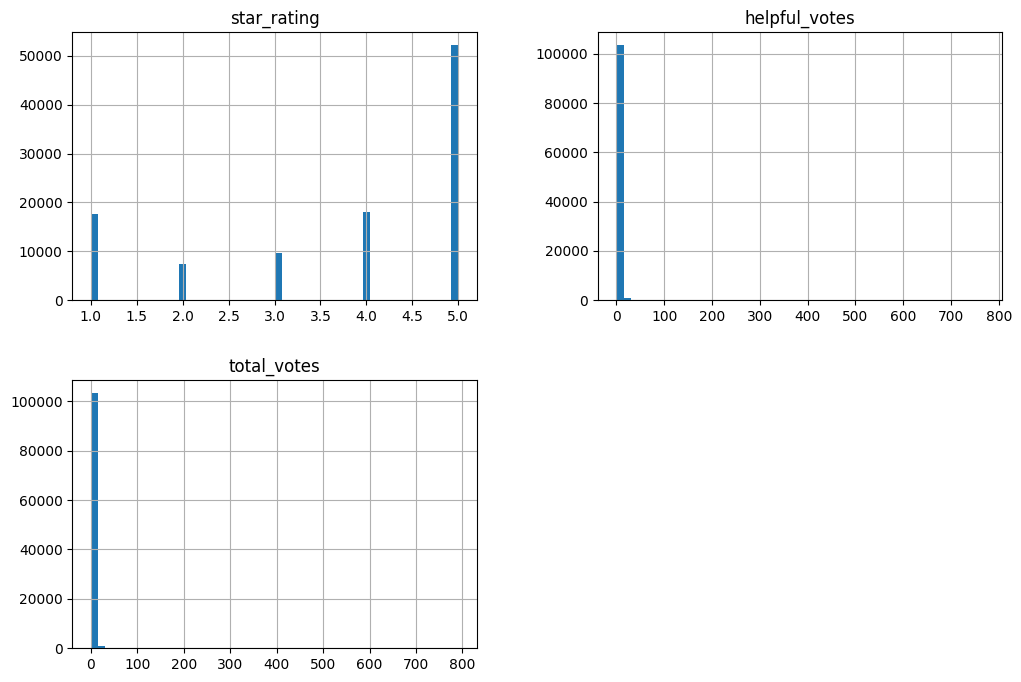

In [ ]:
import matplotlib.pyplot as plt
df.drop(columns=["customer_id", "product_parent"]).hist(bins=50, figsize=(12, 8))
plt.show()

We see that rating of 5 is the majority, we have zero helpful_votes and total_votes this attributes can be dropped

In [ ]:
columns_to_remove = ["helpful_votes", "total_votes"]

Preparing the Data

1. Handling the Missing Values

In [ ]:
df.isnull().sum()

,0
marketplace,0
customer_id,0
review_id,0
product_id,0
product_parent,0
product_title,0
product_category,0
star_rating,2
helpful_votes,2
total_votes,2


In [ ]:
# We dont impute the missing values because they are insignificant
df = df.dropna()

**3. Feature Selection**

In [ ]:
len(df), len(df[df["marketplace"] == "US"]), len(df[df["vine"] == "N"]), len(df[df["product_category"] == "Mobile_Electronics"])

(104846, 104846, 104828, 104846)

In [ ]:
print(columns_to_remove)

['helpful_votes', 'total_votes']


In [ ]:
columns_to_remove.append("marketplace"), columns_to_remove.append("vine"), columns_to_remove.append("product_parent"), columns_to_remove.append("review_id"), columns_to_remove.append("product_category")

(None, None, None, None, None)

In [ ]:
print(columns_to_remove)

['helpful_votes', 'total_votes', 'marketplace', 'vine', 'product_parent', 'review_id', 'product_category']


In [ ]:
df = df.drop(columns=columns_to_remove, errors="ignore")

In [ ]:
df.head()

,customer_id,product_id,product_title,star_rating,verified_purchase,review_headline,review_body,review_date,Words Per Tweet
0,20422322,B00MC4CED8,BlackVue DR600GW-PMP,5.0,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",2015-08-31,26
1,40835037,B00OQMFG1Q,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,5.0,Y,five star,it's great,2015-08-31,2
2,51469641,B00QERR5CY,iXCC Multi pack Lightning cable,5.0,Y,great cables,These work great and fit my life proof case fo...,2015-08-31,13
3,4332923,B00QUFTPV4,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,4.0,Y,Work very well but couldn't get used to not he...,Work very well but couldn't get used to not he...,2015-08-31,20
4,44855305,B0067XVNTG,Generic Car Dashboard Video Camera Vehicle Vid...,2.0,Y,Cameras has battery issues,"Be careful with these products, I have bought ...",2015-08-31,24


4. Feature Engineering


Now, Labeling the sentiment as positive, neutral and negative we assume that;

1–2 stars = Negative

3 stars = Neutral

4–5 stars = Positive

In [ ]:
def sentiment_label(rate):
    if rate <= 2:
        return 'Negative'
    elif rate == 3:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
df["sentiment"] = df["star_rating"].apply(sentiment_label)

In [ ]:
df.columns

Index(['customer_id', 'product_id', 'product_title', 'star_rating',
       'verified_purchase', 'review_headline', 'review_body', 'review_date',
       'Words Per Tweet', 'sentiment'],
      dtype='object')

In [ ]:
df.to_csv(f'{folder_path}/processed.csv')

In [ ]:
df["review"] = df["review_headline"] + " " + df["review_body"]

In [ ]:
df = df.drop(columns=["review_headline", "review_body"], errors="ignore")

In [ ]:
df.head(10)

,customer_id,product_id,product_title,star_rating,verified_purchase,review_date,Words Per Tweet,sentiment,review
0,20422322,B00MC4CED8,BlackVue DR600GW-PMP,5.0,Y,2015-08-31,26,Positive,Very Happy! As advertised. Everything works pe...
1,40835037,B00OQMFG1Q,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,5.0,Y,2015-08-31,2,Positive,five star it's great
2,51469641,B00QERR5CY,iXCC Multi pack Lightning cable,5.0,Y,2015-08-31,13,Positive,great cables These work great and fit my life ...
3,4332923,B00QUFTPV4,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,4.0,Y,2015-08-31,20,Positive,Work very well but couldn't get used to not he...
4,44855305,B0067XVNTG,Generic Car Dashboard Video Camera Vehicle Vid...,2.0,Y,2015-08-31,24,Negative,Cameras has battery issues Be careful with the...
5,7846966,B00KA6CCVY,Aweek® Air Acoustic Earpiece Headset for Baofe...,3.0,Y,2015-08-31,23,Neutral,"It appears to be good, but I'm still waiting f..."
6,21299354,B00MJCDPM2,Sentey LS-4460 B-Trek S8 Bluetooth Portable St...,3.0,Y,2015-08-31,20,Neutral,Didn't love the first one First one arrived as...
7,28902968,B00ET5AWBY,iPad Car Headrest Mount Holder for iPad 2/ iPa...,5.0,Y,2015-08-31,4,Positive,Five Stars Worked great for vacation
8,2074438,B00Z9K379C,ANWING Waterproof Wireless Bluetooth Speaker O...,4.0,Y,2015-08-31,14,Positive,"Four Stars this is a very good item, it provid..."
9,48701722,B00YO3UYXW,Jensen MCR-100 Cassette Player/Recorder 1 Touc...,5.0,Y,2015-08-31,72,Positive,I LOVE my recorder I LOVE my recorder. Bought ...


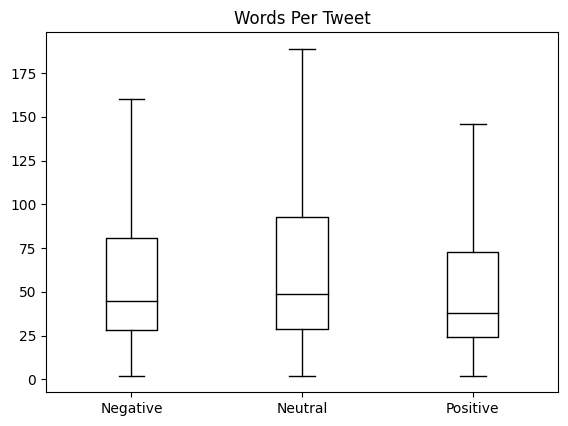

In [ ]:
# check the length of tweets
df["Words Per Tweet"] = df["review"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="sentiment", grid=False,
showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

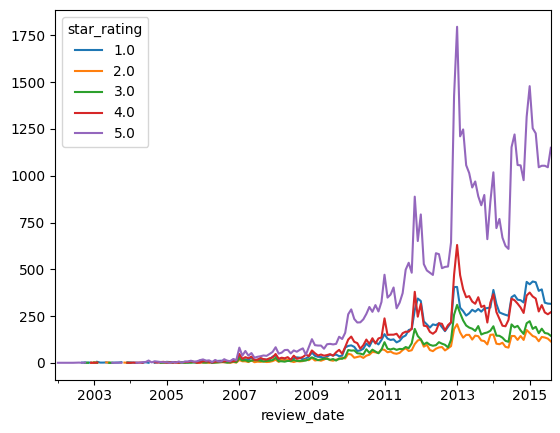

In [ ]:
# view the sentiment by date
df['review_date'] = pd.to_datetime(df['review_date'])
df.groupby(df['review_date'].dt.to_period('M'))['star_rating'].value_counts().unstack().plot()
plt.show()

The trend graph illustrates the distribution of star ratings over time. The most frequently given
rating is 5 stars, consistently remaining high throughout the observed period. Ratings of 1 and 2
stars are considerably lower, indicating relatively few negative reviews. Notably, there’s a noticeable
surge in all ratings, including 5 stars, around February 2014, potentially suggesting an increase in
product purchases or customer engagement during that time. Overall, the trend reflects a generally
positive customer experience with mobile electronics, with 5-star ratings consistently dominating
the distribution.

<Axes: xlabel='review_date'>

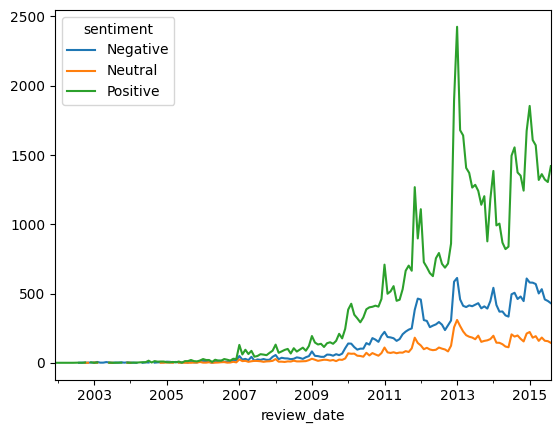

In [ ]:
df['review_date'] = pd.to_datetime(df['review_date'])
df.groupby(df['review_date'].dt.to_period('M'))['sentiment'].value_counts().unstack().plot()

TEXT PROCESSING

Here we convert the raw texts into a format suitable for transformers. Transformers like DistilBert
assume that text has been tokenized and econded as numerical vectors (embeddings)
We use a tokenizer associated with Bert and DistilBert models.

In [ ]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# testing the tokenizer
text = df.iloc[0]["review"]
text

"Very Happy! As advertised. Everything works perfectly, I'm very happy with the camera. As a matter of fact I'm going to buy another one for my 2nd car."

In [ ]:
encoded_text = tokenizer(text)
encoded_text

{'input_ids': [101, 2200, 3407, 999, 2004, 17099, 1012, 2673, 2573, 6669, 1010, 1045, 1005, 1049, 2200, 3407, 2007, 1996, 4950, 1012, 2004, 1037, 3043, 1997, 2755, 1045, 1005, 1049, 2183, 2000, 4965, 2178, 2028, 2005, 2026, 3416, 2482, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'very', 'happy', '!', 'as', 'advertised', '.', 'everything', 'works', 'perfectly', ',', 'i', "'", 'm', 'very', 'happy', 'with', 'the', 'camera', '.', 'as', 'a', 'matter', 'of', 'fact', 'i', "'", 'm', 'going', 'to', 'buy', 'another', 'one', 'for', 'my', '2nd', 'car', '.', '[SEP]']


In [ ]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] very happy! as advertised. everything works perfectly, i ' m very happy with the camera. as a matter of fact i ' m going to buy another one for my 2nd car. [SEP]


In [ ]:
tokenizer.vocab_size # explore the vocabulary size

30522

In [ ]:
tokenizer.model_input_names # name of the fields the model expects in its forward pass

['input_ids', 'attention_mask']


Splitting the data into training testing and validation set

In [ ]:
df = df.drop(columns=["star_rating", "verified_purchase", "review_date"], errors="ignore")
df.head()

,customer_id,product_id,product_title,Words Per Tweet,sentiment,review
0,20422322,B00MC4CED8,BlackVue DR600GW-PMP,28,Positive,Very Happy! As advertised. Everything works pe...
1,40835037,B00OQMFG1Q,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,4,Positive,five star it's great
2,51469641,B00QERR5CY,iXCC Multi pack Lightning cable,15,Positive,great cables These work great and fit my life ...
3,4332923,B00QUFTPV4,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,31,Positive,Work very well but couldn't get used to not he...
4,44855305,B0067XVNTG,Generic Car Dashboard Video Camera Vehicle Vid...,28,Negative,Cameras has battery issues Be careful with the...


In [ ]:
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [ ]:
#converts the Pandas DataFrames train_df, val_df, and test_df into Hugging Face's Dataset objects
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

review_data_dict = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset,
    'test': test_dataset
})

review_data_dict

DatasetDict({
    train: Dataset({
        features: ['customer_id', 'product_id', 'product_title', 'Words Per Tweet', 'sentiment', 'review', '__index_level_0__'],
        num_rows: 67100
    })
    validation: Dataset({
        features: ['customer_id', 'product_id', 'product_title', 'Words Per Tweet', 'sentiment', 'review', '__index_level_0__'],
        num_rows: 16776
    })
    test: Dataset({
        features: ['customer_id', 'product_id', 'product_title', 'Words Per Tweet', 'sentiment', 'review', '__index_level_0__'],
        num_rows: 20970
    })
})

In [ ]:
review_data_dict = review_data_dict.remove_columns(["__index_level_0__"])

In [ ]:

from datasets import ClassLabel
#convert the sentiment into class label
review_data_dict = review_data_dict.cast_column("sentiment", ClassLabel(names=['Negative', 'Neutral', 'Positive']))
review_data_dict['train'].features


Casting the dataset:   0%|          | 0/67100 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/16776 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/20970 [00:00<?, ? examples/s]

{'customer_id': Value(dtype='int64', id=None),
 'product_id': Value(dtype='string', id=None),
 'product_title': Value(dtype='string', id=None),
 'Words Per Tweet': Value(dtype='int64', id=None),
 'sentiment': ClassLabel(names=['Negative', 'Neutral', 'Positive'], id=None),
 'review': Value(dtype='string', id=None)}

In [ ]:
review_data_dict["test"].features["sentiment"]

ClassLabel(names=['Negative', 'Neutral', 'Positive'], id=None)

In [ ]:
review_data_dict["validation"].features["sentiment"]

ClassLabel(names=['Negative', 'Neutral', 'Positive'], id=None)

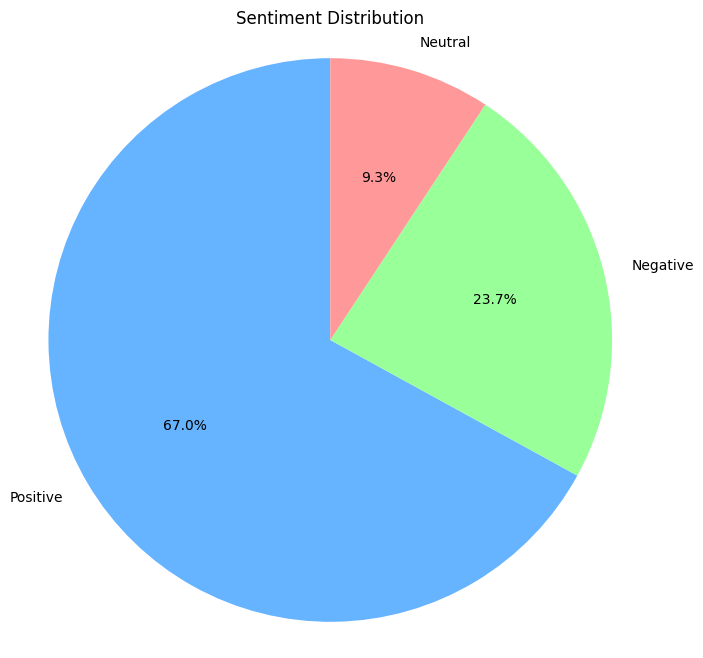

In [ ]:
import matplotlib.pyplot as plt

# Get sentiment counts directly from the Pandas Series
sentiment_counts = df['sentiment'].value_counts()

# Convert to NumPy array for pie chart plotting
sentiment_counts_np = sentiment_counts.to_numpy()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts_np, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=['#66b3ff','#99ff99','#ff9999'], startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle
plt.show()


Tokenizing the text corpus

In [ ]:
# Tokenizing the whole dataset
def tokenize(batch):
  # pad e.gs to the size of the longes one in the batch then truncate to the model's maximum context size
  return tokenizer(batch["review"], padding=True, truncation=True)

review_encoded = review_data_dict.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/67100 [00:00<?, ? examples/s]

Map:   0%|          | 0/16776 [00:00<?, ? examples/s]

Map:   0%|          | 0/20970 [00:00<?, ? examples/s]

In [ ]:
# after tokenizing the resulting dataset also include input_ids and attention_masks
print(review_encoded["train"].column_names)

['customer_id', 'product_id', 'product_title', 'Words Per Tweet', 'sentiment', 'review', 'input_ids', 'attention_mask']


In [ ]:
# Save procesed data
review_encoded.save_to_disk(folder_path)

Saving the dataset (0/1 shards):   0%|          | 0/67100 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/16776 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/20970 [00:00<?, ? examples/s]